In [ ]:
import gzip
f = gzip.open('/content/drive/MyDrive/Widya Wicara Test/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 100

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

In [ ]:
len(data)

100

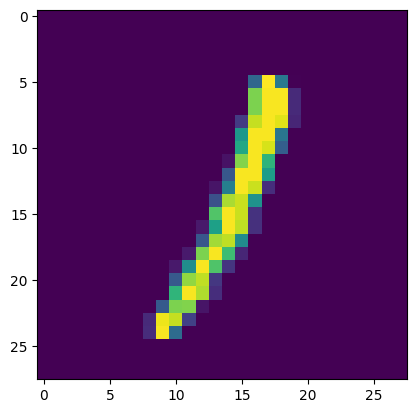

In [ ]:
import matplotlib.pyplot as plt
image = np.asarray(data[99]).squeeze()
plt.imshow(image)
plt.show()

In [ ]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
for i in range(0,50):
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    print(labels)

[5]
[0]
[4]
[1]
[9]
[2]
[1]
[3]
[1]
[4]
[3]
[5]
[3]
[6]
[1]
[7]
[2]
[8]
[6]
[9]
[4]
[0]
[9]
[1]
[1]
[2]
[4]
[3]
[2]
[7]
[3]
[8]
[6]
[9]
[0]
[5]
[6]
[0]
[7]
[6]
[1]
[8]
[7]
[9]
[3]
[9]
[8]
[5]
[9]
[3]


In [ ]:
import os
import gzip
import struct
import urllib.request
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as pl

In [ ]:
def download_mnist(url, filepath):
    if not os.path.exists(filepath):
        urllib.request.urlretrieve(url, filepath)


def read_mnist_labels(filepath):
    with gzip.open(filepath, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


def read_mnist_images(filepath):
    with gzip.open(filepath, 'rb') as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(size, rows, cols)
    return images

In [ ]:
# Download dataset training
train_images_url = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
train_labels_url = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
download_mnist(train_images_url, "train-images-idx3-ubyte.gz")
download_mnist(train_labels_url, "train-labels-idx1-ubyte.gz")

# Read training images and labels
train_images = read_mnist_images("train-images-idx3-ubyte.gz")
train_labels = read_mnist_labels("train-labels-idx1-ubyte.gz")



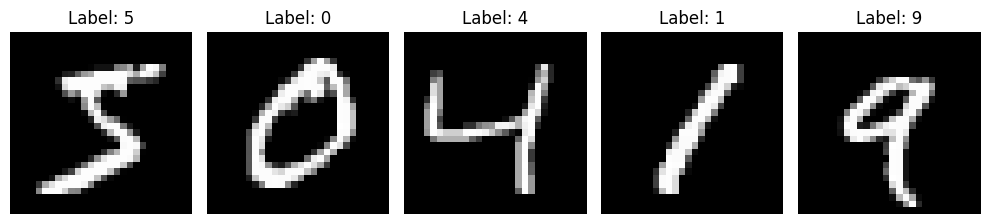

In [ ]:
# Menampilkan beberapa gambar dan label
num_images_to_display = 5

fig, axs = plt.subplots(1, num_images_to_display, figsize=(10, 3))

for i in range(num_images_to_display):
    image = train_images[i]
    label = train_labels[i]

    # Menampilkan gambar
    axs[i].imshow(image, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Label: {label}")

plt.tight_layout()
plt.show()


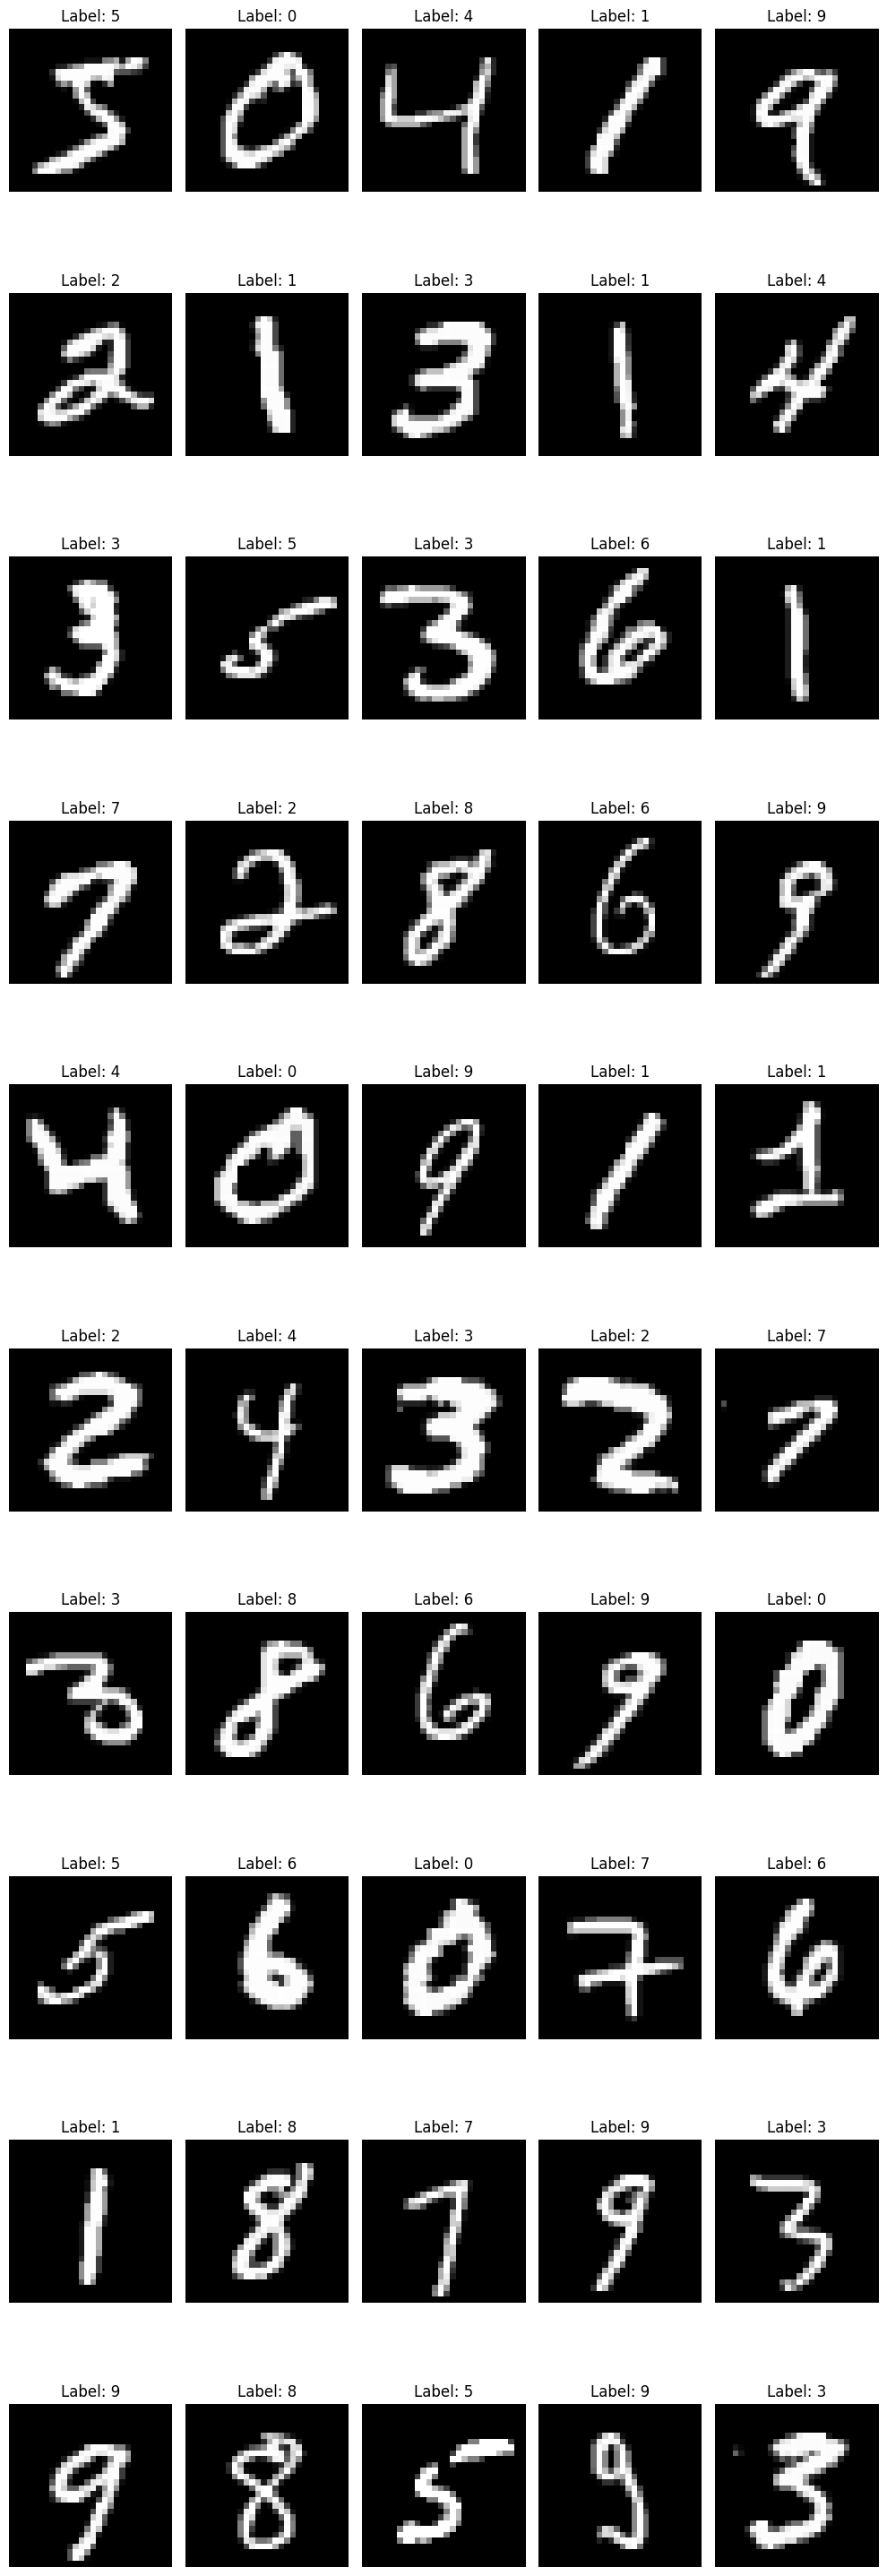

In [ ]:
# Menampilkan beberapa gambar dan label
num_images_to_display = 50
num_rows = (num_images_to_display + 4) // 5

fig, axs = plt.subplots(num_rows, 5, figsize=(10, 3 * num_rows))

for i in range(num_images_to_display):
    row = i // 5
    col = i % 5
    image = train_images[i]
    label = train_labels[i]

    # Menampilkan gambar
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f"Label: {label}")

# Menghapus subplot yang tidak digunakan
if num_images_to_display < num_rows * 5:
    for j in range(num_images_to_display, num_rows * 5):
        axs[j // 5, j % 5].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Extract features using HOG on training dataset
hog_features = []
for image in train_images:
    fd = hog(image, orientations=9, pixels_per_cell=(3, 3), cells_per_block=(2, 2), visualize=False)
    hog_features.append(fd)
X_train_hog = np.array(hog_features)
y_train = train_labels

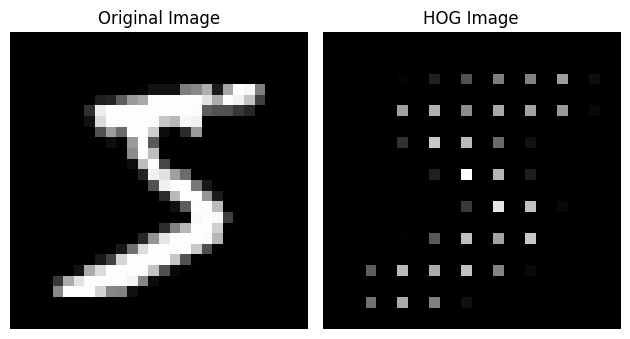

In [ ]:
# Memilih salah satu gambar
image_index = 0
image = train_images[image_index]

# Ekstraksi fitur HOG
hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(3, 3), cells_per_block=(2, 2), visualize=True)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Menampilkan gambar hasil HOG
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Train SVM with HOG features
svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X_train_hog, y_train)

SVC(kernel='linear')

In [ ]:
# Download dataset testing
test_images_url = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
test_labels_url = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
download_mnist(test_images_url, "t10k-images-idx3-ubyte.gz")
download_mnist(test_labels_url, "t10k-labels-idx1-ubyte.gz")

# Read testing images and labels
test_images = read_mnist_images("t10k-images-idx3-ubyte.gz")
test_labels = read_mnist_labels("t10k-labels-idx1-ubyte.gz")

In [ ]:
# Extract features using HOG on testing dataset
hog_features_test = []
for image in test_images:
    fd = hog(image, orientations=9, pixels_per_cell=(3, 3), cells_per_block=(2, 2), visualize=False)
    hog_features_test.append(fd)
X_test_hog = np.array(hog_features_test)
y_test = test_labels

# Prediksi kelas menggunakan SVM
y_pred = svm.predict(X_test_hog)

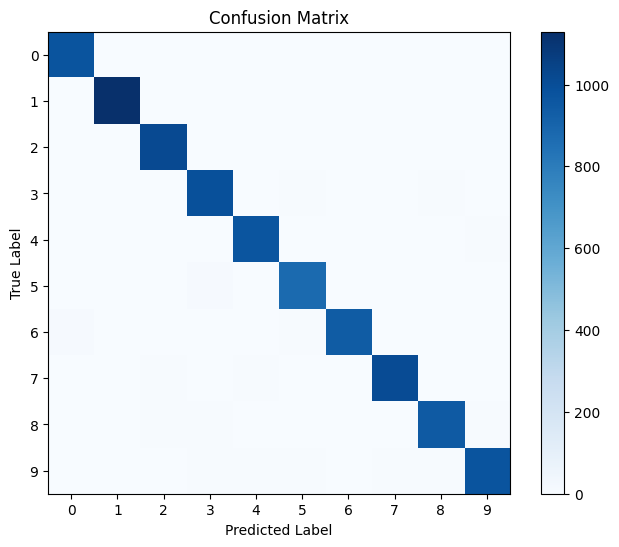

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

confusion_mat = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

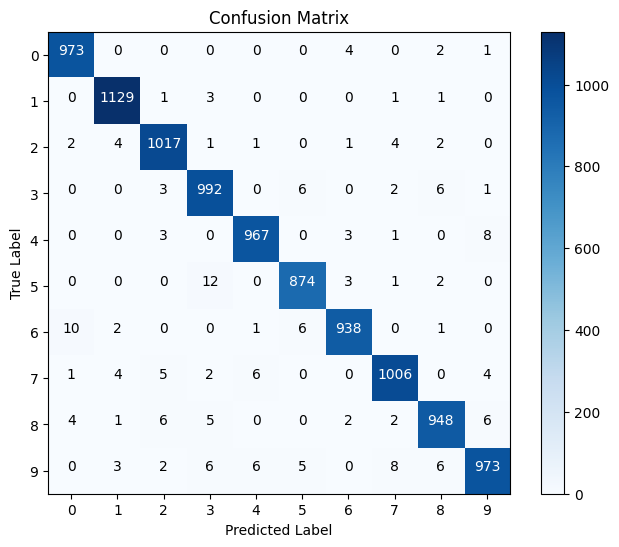

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

confusion_mat = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))

thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


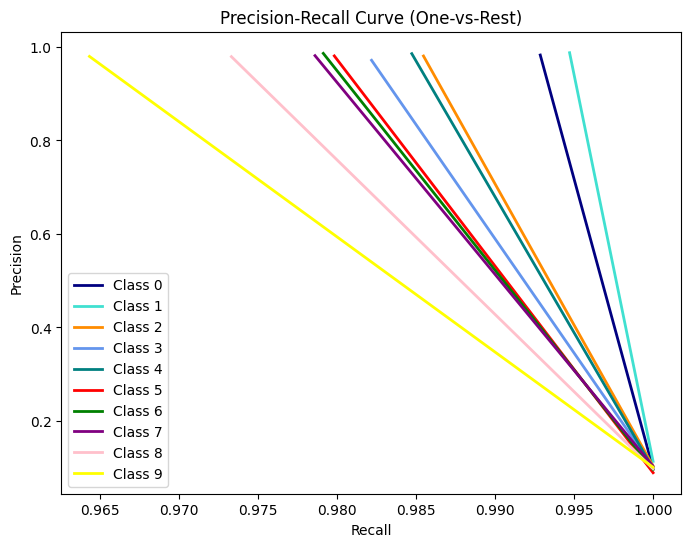

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert labels to binary format
y_test_binary = label_binarize(y_test, classes=np.arange(10))
y_pred_binary = label_binarize(y_pred, classes=np.arange(10))

# Compute precision and recall for each class
precision = dict()
recall = dict()
precision_curve = dict()
recall_curve = dict()

# Compute precision and recall for each class
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_pred_binary[:, i])
    precision_curve[i] = precision[i][:-1]
    recall_curve[i] = recall[i][:-1]

# Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'purple', 'pink', 'yellow'])
for i, color in zip(range(10), colors):
    plt.plot(recall_curve[i], precision_curve[i], color=color, lw=2, label='Class {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='lower left')
plt.show()


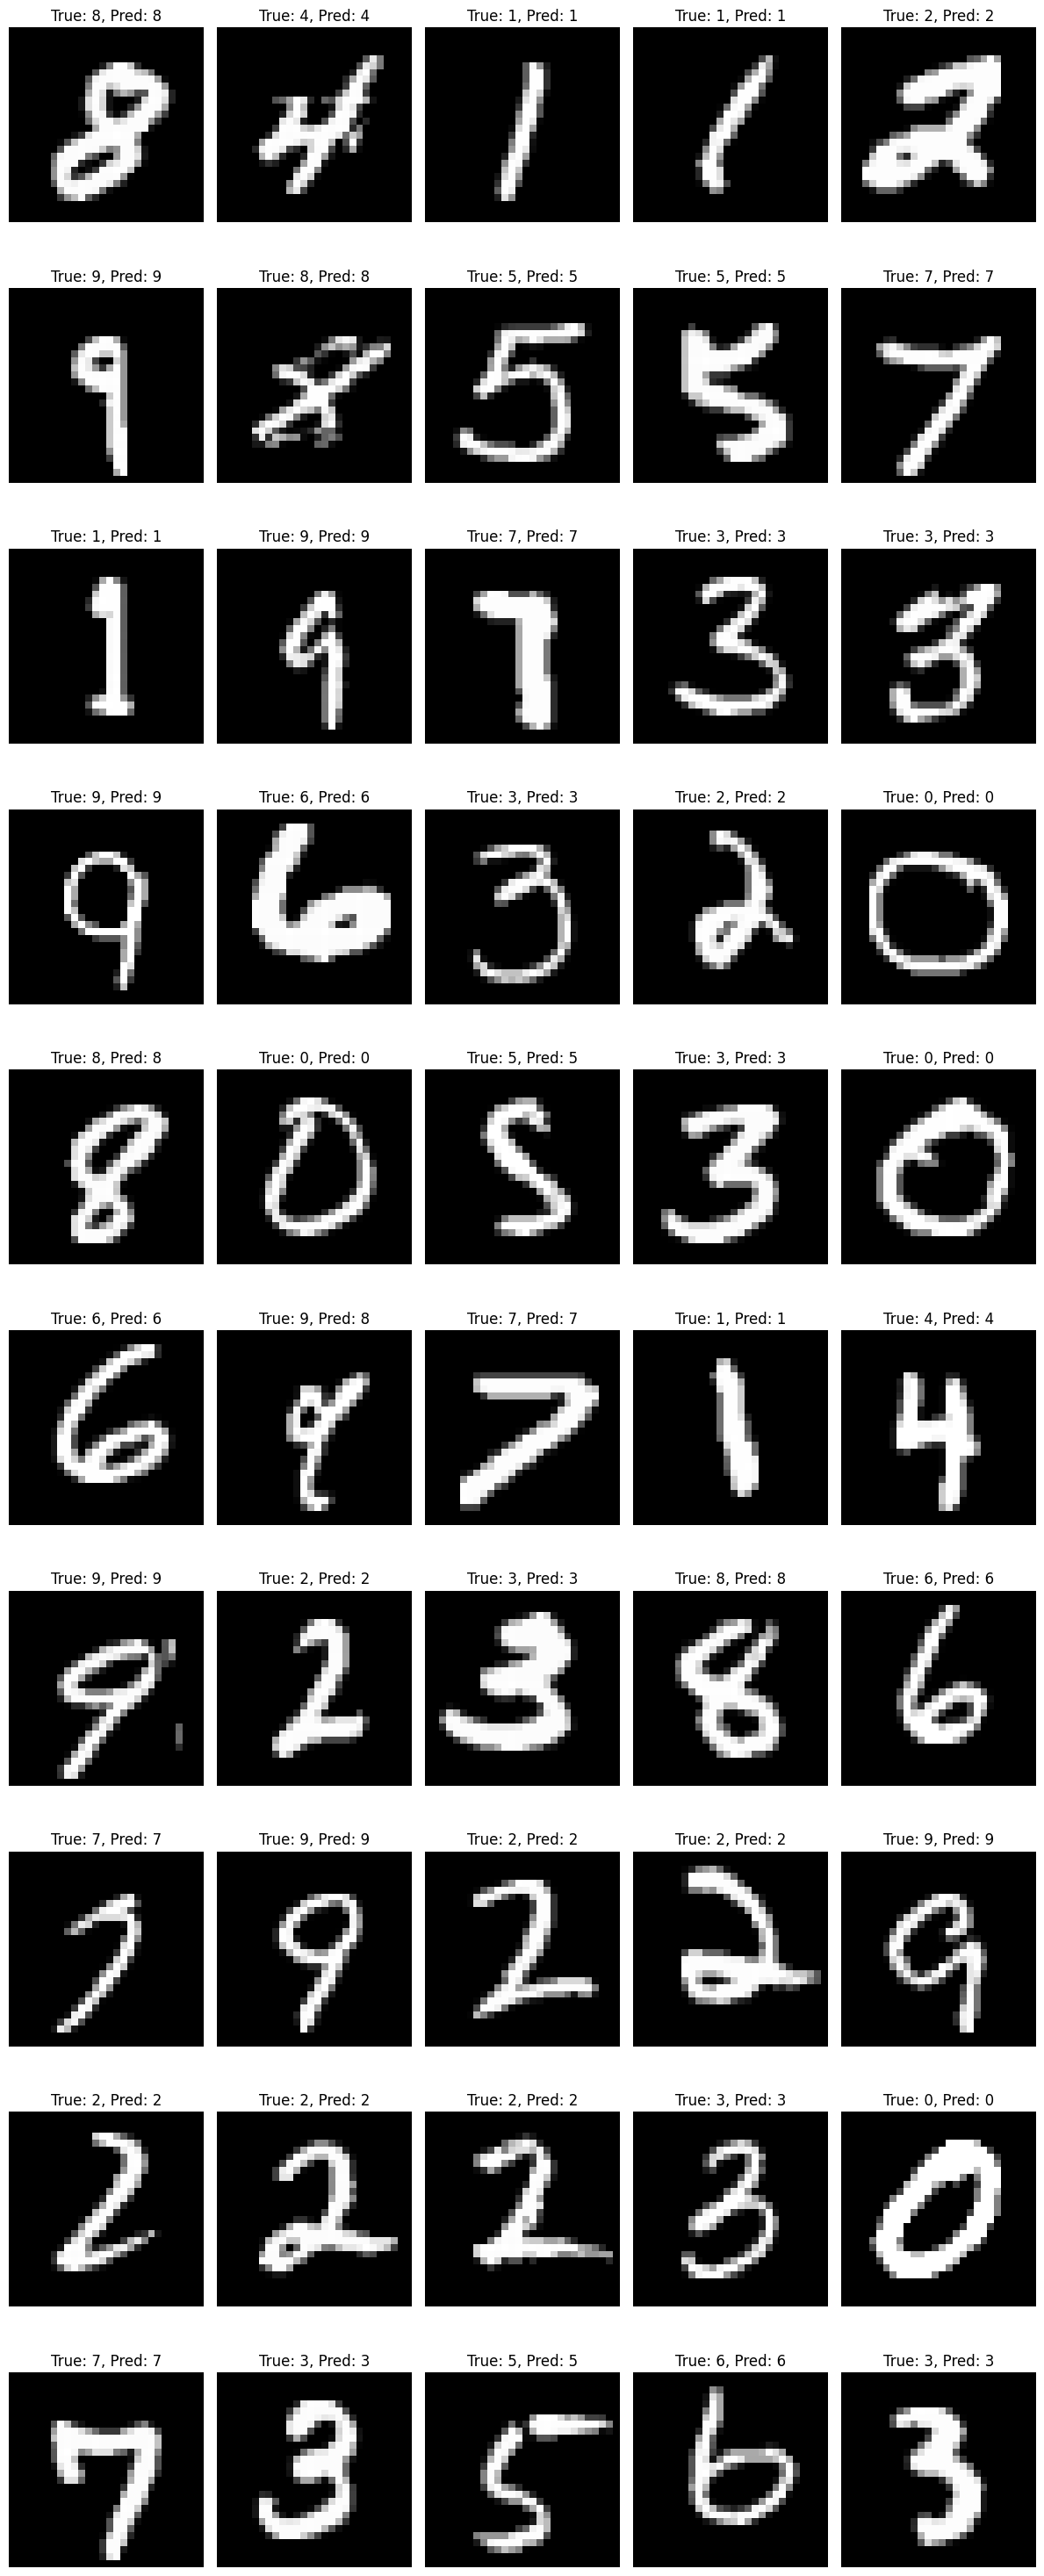

In [ ]:
# Select random test samples
num_samples = 50
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Extract HOG features for sample images
hog_features_sample = []
for image in sample_images:
    fd = hog(image, orientations=9, pixels_per_cell=(3, 3), cells_per_block=(2, 2), visualize=False)
    hog_features_sample.append(fd)
X_sample_hog = np.array(hog_features_sample)

# Make predictions on sample images
y_pred_sample = svm.predict(X_sample_hog)

# Visualize sample images with predicted labels
num_rows = (num_samples + 4) // 5
fig, axs = plt.subplots(num_rows, 5, figsize=(12, 3 * num_rows))

for i in range(num_samples):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(sample_images[i], cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f"True: {sample_labels[i]}, Pred: {y_pred_sample[i]}")

for j in range(num_samples, num_rows * 5):
    row = j // 5
    col = j % 5
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Perhitungan akurasi, presisi, dan recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Akurasi: ", accuracy)
print("Presisi: ", precision)
print("Recall: ", recall)

Akurasi:  0.9817
Presisi:  0.9817047703649084
Recall:  0.9817


In [ ]:
import os
import gzip
import struct
import urllib.request
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


def download_mnist(url, filepath):
    if not os.path.exists(filepath):
        urllib.request.urlretrieve(url, filepath)


def read_mnist_labels(filepath):
    with gzip.open(filepath, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


def read_mnist_images(filepath):
    with gzip.open(filepath, 'rb') as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(size, rows, cols)
    return images


# Download dataset training
train_images_url = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
train_labels_url = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
download_mnist(train_images_url, "train-images-idx3-ubyte.gz")
download_mnist(train_labels_url, "train-labels-idx1-ubyte.gz")

# Read training images and labels
train_images = read_mnist_images("train-images-idx3-ubyte.gz")
train_labels = read_mnist_labels("train-labels-idx1-ubyte.gz")

# Extract features using HOG on training dataset
hog_features = []
for image in train_images:
    fd = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    hog_features.append(fd)
X_train_hog = np.array(hog_features)
y_train = train_labels

# Train SVM with HOG features
svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X_train_hog, y_train)


# Download dataset testing
test_images_url = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
test_labels_url = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
download_mnist(test_images_url, "t10k-images-idx3-ubyte.gz")
download_mnist(test_labels_url, "t10k-labels-idx1-ubyte.gz")

# Read testing images and labels
test_images = read_mnist_images("t10k-images-idx3-ubyte.gz")
test_labels = read_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Extract features using HOG on testing dataset
hog_features_test = []
for image in test_images:
    fd = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    hog_features_test.append(fd)
X_test_hog = np.array(hog_features_test)
y_test = test_labels

# Prediksi kelas menggunakan SVM
y_pred = svm.predict(X_test_hog)

# Perhitungan akurasi, presisi, dan recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Akurasi: ", accuracy)
print("Presisi: ", precision)
print("Recall: ", recall)


Akurasi:  0.9575
Presisi:  0.9575080711229844
Recall:  0.9575
